In [5]:
%matplotlib inline
%config IPCompleter.greedy=True

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#分類用データセット生成
centers = [(-1,-0.125),(0.5,0.5)]
#サンプル数50,特徴量2、クラスタ数2、標準偏差0.3
X, y = make_blobs(n_samples=50,n_features=2,centers=centers,cluster_std=0.3)
#30%がテスト用になるようにランダム抽出
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

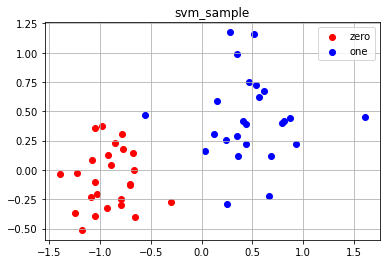

In [18]:
#散布図
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
df = pd.concat([X_df,y_df],axis=1)
df.columns = ["v1","v2","target"]
#targetが0/1で分割
df_0 = df[df["target"]==0]
df_1 = df[df["target"]==1]

#図示
fig, ax = plt.subplots()
ax.set_title("svm_sample")
ax.scatter(df_0["v1"],df_0["v2"],color="red",label="zero")
ax.scatter(df_1["v1"],df_1["v2"],color="blue",label="one")
ax.grid()
ax.legend()

In [19]:
#線形SVMで分類実施
model = LinearSVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
#正答率
accuracy_score(y_pred,y_test)

1.0

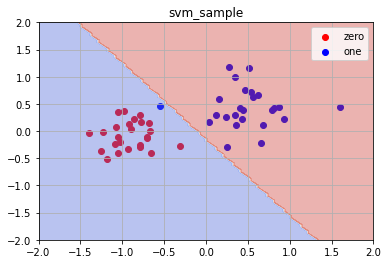

In [22]:
#決定境界
#グラフ用格子点
v1 = np.linspace(-2,2,100)
v2 = np.linspace(-2,2,100)
X_v1, X_v2 = np.meshgrid(v1,v2)
Z = model.predict(np.array([X_v1.ravel(),X_v2.ravel()]).T)
Z = Z.reshape(X_v1.shape)

#TODO：テスト用と学習用は見た目分けるべき(検証データでは正答率1だけど、多分学習データでは1じゃないっぽい)

#図示
fig, ax = plt.subplots()
ax.set_title("svm_sample")
ax.scatter(df_0["v1"],df_0["v2"],color="red",label="zero")
ax.scatter(df_1["v1"],df_1["v2"],color="blue",label="one")
ax.contourf(X_v1,X_v2,Z,alpha=0.4,cmap="coolwarm")
ax.grid()
ax.legend()